<center>
<h1> Dennis Murray<br>

 MSDS 7349<br>

 Homework 3<br>
</h1>
</center>

### Exercise 1: Simple Substitution Cipher

Exercise 1 asks us to explore construction of a simple substitution (Caesar) cipher.  First I'll explore use of the ord() and chr () commands on the letter D.


In [1]:
letter = "D"
# converts a letter to ascii code 
ascii_code = ord(letter)
# converts ascii code to a letter 
letter_res = chr(ascii_code)
print (ascii_code, letter_res)

68 D


Every ASCII letter has a corresponding numeric value.  There's a separate set for capital letters and lower case letters.  In the full script below, I'll test for this.

In [25]:
#readline will be used to gather input from the user
import readline

#what phrase does the user want to encrpyt?
phrase=input("Enter phrase to encode: ")

#what shift value will be encoded?
shift=input("enter shift value: ")

#Creates an empty string to store the encoded phrase
encodedPhrase = ""

#For every character in the phrase the user entered,
for c in phrase:
    #add it one letter at a time to the encoded phrase
    encodedPhrase = encodedPhrase + c

#then print the entire encoded phrase
#note the indent (or lack of) - this means it will happen *after* the loop is done.
print(encodedPhrase)

Enter phrase to encode: What time will you arrive in Dallas?
enter shift value: 5
What time will you arrive in Dallas?


The loop as written walks through the phrase supplied one character at a time, and rebuilds the original phrase one character at a time.  The shift character or conversion to or from ASCII was not applied.  However, it's a good example of understanding string handling in a loop as well as use of input().

In [26]:
#Combine the two pieces of information we've received already

#readline will be used to gather input from the user
import readline

#what phrase does the user want to encrpyt?
phrase=input("Enter phrase to encode: ")

#get the shift value to use
shift=int(input("enter shift value: "))

#empty variable to build our encoded data into
encodedPhrase = ""

#walk through the phrase, 1 character at a time
for c in phrase:
    #Convert the character to numeric value, shift it, and then return it as a character
    #Test to see if the condition of being alphabetic is met.  While there are 
    #ASCII codes for special characters - our instructions specify to only convert alphabetic characters
    if c.isalpha():
        #if it's met shift the value by the indicated amount
        #our shifted value needs to stay in the range of 65 to 122
        #because that's what corresponds to "A" to "z" (note capital and lowers...it's important and different)
        #"A" is 65
        #"Z" is 90
        #"a" is 97
        #"z" is 122
        #logical test: is c in range of <=90...this encompasses UPPER CASE letters
        if ord(c)<=90:
            #This will add the shift, subtract 64 (as "A"=65 and not 1) and then mod the value, and
            #then add the 64 back in to give us a char #
            #and then convert it back to the character
            #and append it to the phrase
            encodedPhrase = encodedPhrase + chr((ord(c)+shift-64)%26+64)
        else:
            #Here's where we will handle lower case values
            #we still mod 26 as there are 26 letters in the alphabet
            #but we use 96 as the add/subtract value as "a" = 96
            encodedPhrase = encodedPhrase + chr((ord(c)+shift-97)%26+97)
    #bypass both of these tests if it's not an alphabetic character
    else:
        #otherwise just add it to the phrase
        #this applies to spaces, punctuation, numbers and anything that isn't alphabetic
        #again note the indent
        encodedPhrase = encodedPhrase + c


#print the value out
print(encodedPhrase)

Enter phrase to encode: What time will you arrive in Dallas?
enter shift value: 4
Alex xmqi ampp csy evvmzi mr Heppew?


# Exercise 2: Breaking a Simple Cypher

Exercise 2 asks us to break a simple cipher, using a technique better than brute force.  The text as well as the video lectures suggest that cryptanalysis of letter frequency would lead us to assume that the most frequent letter in any ciphertext will correspond to a plaintext of "e".

My method will perform a cryptanalysis to find the frequency of each ciphertext alphabetic character, then work in descending order for each ciphertext character until it runs through all of the possibilites.  The decrypted text will be displayed with the shift character for the analyst to review, with the most likely decryptions listed first.

In [35]:
import string
alpha = list(string.ascii_lowercase)
import pandas as pd
#import pd.sort_values as sort_values

S=input("Enter phrase to decode: ")


#covert to all lower case, so we can see true frequency of letters
#We don't care for purposes of cryptanalysis whether a character is capital or lower case
SLower = S.lower()


#print(SLower)

#Find frequency of each letter
#put them in a dataframe
counts = pd.DataFrame({'Frequency':[SLower.count(letter) for letter in alpha], 'Letter':[letter for letter in alpha]})

#sort the dataframe in descending order
counts = counts.sort_values(by='Frequency', ascending=False)

#reindex the data frame, so most frequent = first entry
counts.index=range(len(counts))

#Now that we have the counts, let's start with first item and then process in order
#So we should get the original phrase back within the first several rows returned
attempt = 1
#Loop: each value in our data frame
for i in counts['Letter']:
    #determine the difference between our current letter and "e"
    #based on the numeric values of "e" and our current value to test
    shift = ord("e") - ord(i)

    #empty string to place our rebuilt values into
    Plaintext = ""
    
    #Loop through our Ciphertext
    #Note I'm not using the lowercase only value here - I've returned to our mixed case value here so
    #the proper case will be returned
    for c in S:
        
        #test for alphabetic
        if c.isalpha():
            
            #Test for if the value is in the upper case range
            if ord(c)<=90:
                #first value for uppercase is 65.  So I subtract 65, mod by the 26 letters in the
                #alphabet, and then add 65 back in
                Plaintext = Plaintext + chr((ord(c)+shift-65)%26+65)
            
            #otherwise it must be lowercase
            else:
                #first value for uppercase is 97.  So I subtract 97, mod by the 26 letters in the
                #alphabet, and then add 97 back in
                Plaintext = Plaintext + chr((ord(c)+shift-97)%26+97)
        else:
            #otherwise, it must be a non-alphabetic character and we don't want to translate that.

            Plaintext = Plaintext + c
        
    
    print("Attempt", attempt, "KEY:", abs(shift), "PlainText:",  Plaintext)
    attempt = attempt + 1

Enter phrase to decode: Zsjvogjc hsqk gxx af lzw xmlmjw.  Dsrafwkk hsqk gxx fgo.
Attempt 1 KEY: 19 PlainText: Gzqcvnqj ozxr nee hm sgd etstqd.  Kzyhmdrr ozxr nee mnv.
Attempt 2 KEY: 14 PlainText: Levhasvo tecw sjj mr xli jyxyvi.  Pedmriww tecw sjj rsa.
Attempt 3 KEY: 2 PlainText: Xqhtmeha fqoi evv yd jxu vkjkhu.  Bqpyduii fqoi evv dem.
Attempt 4 KEY: 6 PlainText: Tmdpiadw bmke arr uz ftq rgfgdq.  Xmluzqee bmke arr zai.
Attempt 5 KEY: 18 PlainText: Hardwork pays off in the future.  Laziness pays off now.
Attempt 6 KEY: 1 PlainText: Yriunfib grpj fww ze kyv wlkliv.  Crqzevjj grpj fww efn.
Attempt 7 KEY: 5 PlainText: Uneqjbex cnlf bss va gur shgher.  Ynmvarff cnlf bss abj.
Attempt 8 KEY: 4 PlainText: Dwnzskng lwuo kbb ej pda bqpqna.  Hwvejaoo lwuo kbb jks.
Attempt 9 KEY: 8 PlainText: Rkbngybu zkic ypp sx dro pedebo.  Vkjsxocc zkic ypp xyg.
Attempt 10 KEY: 12 PlainText: Ngxjcuxq vgey ull ot znk lazaxk.  Rgfotkyy vgey ull tuc.
Attempt 11 KEY: 10 PlainText: Pizlewzs xiga wnn qv bpm ncbczm.  

### Colleagues Phrases to Break, and the Number of attempts found after:

Cory Adams: "Glad this course uses Python", Key (Shift) of 7.  Found on 2nd attempt

Alex Deshowitz: "SMU DataScience", Key (Shift) of 5.  Found on 1st Attempt

Bill Kerneckel: "Too Many Secrets!" Key shift of 13.  Found on 1st Attempt

Armand Post: "Hardwork pays off in the future.  Laziness pays off now."  Key shift of 18.  Found on 5th Attempt.


This algorithm could stand to be improved - adding a second character test (perhaps 'n' or 'r') and finding shifts that satisfy both tests could reduce the rounds of tests needed.  However, each round would be more computationally intensive.  Adding language recognition to the output could also reduce or eliminate need for human intervention to inspect the results.

## Exercise 3: AES

Exercise 3 asks us to encrypt using AES-128 an image file.

I'll first build the code to encode and print a test phrase, and then I'll show the application to a JPEG file.

In [29]:
#AES-128 implementation in Python
#RUn through with text first to understand use
#documentation source: http://pythonhosted.org/pycrypto/
#https://www.dlitz.net/software/pycrypto/api/current/
#StackOverflow Thread: http://stackoverflow.com/questions/29039773/produce-the-ecb-penguin-with-aes-in-python
from matplotlib.pyplot import imshow
import numpy as np
from Crypto.Cipher import AES
from PIL import Image
%matplotlib inline
from Crypto.Util import Counter
import base64
from Crypto import Random


#With a 16 bit key we need to make sure the length of our file is a 16 divisible number
#if it isn't already, we will pad the back end of it with spaces

#My Key: needs to be 16 characters long
mykey = 'SMUMarchMadNeSsS'
#and then encoded as UTF-8 characters
mykey = mykey.encode('UTF-8')

teststring="encrypt this string now and then printing the results"


#print(len(teststring))

#Test and then Pad the length of the string to be multiple of 16, the key length. Otherwise
#the encryption task will fail
#convert to 'bytes' data type
teststring = (bytes(teststring, 'UTF-8'))

#pad to a multiple of 16 using the mod function
teststring = teststring + bytes(' '*(len(mykey)-len(teststring)%len(mykey)), 'UTF-8')

#make an initialization vector for the encryption
iv = Random.new().read(AES.block_size)

#Make an AES Cipher object with mode of "CBC" - cipher block chain
cipher = AES.new(mykey, AES.MODE_CBC, IV=iv)

#Encrpyt our test string using the object, and append it to the intialization vector so the 
#recipient will know how to decode it knowing the IV is the first 16 characters of the string
encryptedstring=iv+(cipher.encrypt(teststring))
print("Encrypted:", base64.b64encode(encryptedstring))

#Split the encryption to the initialization vector and the piece to decode
decodeme = encryptedstring[16:]
iv=encryptedstring[:16]
#build new AES cipher using the initialization vector
cipher = AES.new(mykey, AES.MODE_CBC, IV=iv)

#Perform the decryption and print results
unencrypted = (cipher.decrypt(decodeme))
print("Decrypted:", (unencrypted))



Encrypted: b'k3oKHgNg4JJfQXwmx4R/w1ZxnbNkjHc57zL0M0fIk7kyfhEF2ldpygCGZhW+5S2f8hoPPprIhakFgDwhfN97aXNRGarN1Te4hGm/NaADqRc='
Decrypted: b'encrypt this string now and then printing the results           '


Now that I've established a general workflow for encryption using python and the AES-128 algorithm, we can attempt to complete the encryption of an image file.  The same image file will be encrypted using 3 modes of operation: County (CTR), Cipher Block Chain (CBC), and Electronic Code Book (ECB).  In all 3 modes of operation, I will employ the same 16-bit key to encrypt the image.

AxesImage(54,36;334.8x217.44)
(2362, 1417)


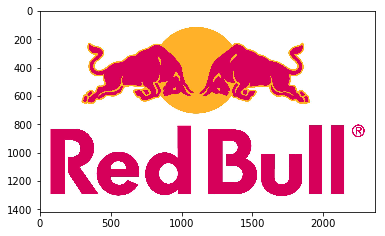

In [30]:
from PIL import Image
%matplotlib inline

logo = Image.open("redbulllogo.jpg", 'r')

print(imshow(logo))

print(logo.size)

The image file I've selected is a 2362 x 1417 pixel version of the Red Bull "Sun and Bulls" logo including the wordmark. 

### ECB (Electronic Code Book) Mode

First we will employ Electronic Code Book (ECB) and display the results.

AxesImage(54,36;334.8x217.44)


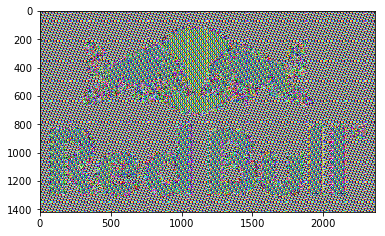

In [31]:
# AES-128 implementation in Python
#documentation source: http://pythonhosted.org/pycrypto/
#StackOverflow Thread: http://stackoverflow.com/questions/29039773/produce-the-ecb-penguin-with-aes-in-python
from matplotlib.pyplot import imshow
import numpy as np
from Crypto.Cipher import AES
from PIL import Image
%matplotlib inline

import binascii
import os

#Open the image file and display it in the results
logo = Image.open("redbulllogo.jpg", 'r')

#declare the key and encode it inUTF-8
mykey = 'SMUMarchMadNeSsS'
mykey = mykey.encode('UTF-8')

#convert the logo to a bytestream
logobytes = logo.tobytes()

#ECB requres that the image have a length equal to a length divisible by 16
paddedimage = logobytes + bytes(' '*(len(mykey)-len(logobytes)%len(mykey)), 'UTF-8')

#Create an AES Cipher using the Key and ECB Mode
cipher = AES.new(mykey, AES.MODE_ECB)

#Encryt the padded image using the cipher we defined in the prior step
encryptedstring=(cipher.encrypt(paddedimage))

#Convert the bytes back to an RGB image and show the results
encrypted_image = Image.frombytes("RGB", data = encryptedstring, size = logo.size)
print(imshow(encrypted_image))

Just like the Linux penguin on the Wikipedia page - we've encrypted our image, but the limited key length relative to the file size has rendered the logo more monochromatic, but still with a very recognizable structure to it.

### CBC (Cipher Block Chain) Mode

Next we will attempt the Cipher block chain mode of operation to encrypt the image.  We expect to have a better result with this mode of operation, as there is iteration of the values the data in the file is XOR'd with between the blocks.

AxesImage(54,36;334.8x217.44)


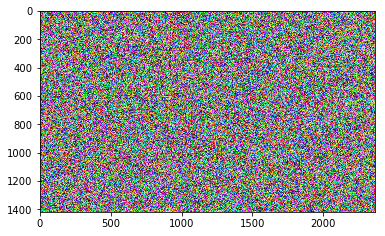

In [32]:
# AES-128 implementation in Python
#documentation source: http://pythonhosted.org/pycrypto/
#StackOverflow Thread: http://stackoverflow.com/questions/29039773/produce-the-ecb-penguin-with-aes-in-python
from matplotlib.pyplot import imshow
import numpy as np
from Crypto.Cipher import AES
from PIL import Image
%matplotlib inline

import binascii
import os

#make an initialization vector for the encryption
iv = Random.new().read(AES.block_size)


#Open the image file and display it in the results
logo = Image.open("redbulllogo.jpg", 'r')

#declare the key and encode it
mykey = 'SMUMarchMadNeSsS'
mykey = mykey.encode('UTF-8')

#convert the logo image to a byte stream
logobytes = logo.tobytes()

#pad the logo image to a fixed length
paddedimage = logobytes + bytes(' '*(len(mykey)-len(logobytes)%len(mykey)), 'UTF-8')

#create a new AES Cipher using mykey, and mode CBC, and the initialization vector declared above
cipher = AES.new(mykey, AES.MODE_CBC, IV=iv)

#encrypt the image's padded byte stream
encryptedstring=(cipher.encrypt(paddedimage))

#render the bytestream as a JPEG and display
encrypted_image = Image.frombytes("RGB", data = encryptedstring, size = logo.size)
print(imshow(encrypted_image))


A much better result is returned from Cipher Block Chain mode (CBC) than we received from the ECB.  At least within what can be perceived visually, the image looks like nearly random and uniform noise.

AxesImage(54,36;334.8x217.44)


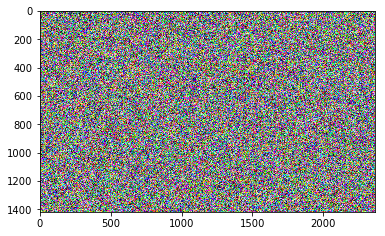

In [33]:
# AES-128 implementation in Python
#documentation source: http://pythonhosted.org/pycrypto/
#StackOverflow Thread: http://stackoverflow.com/questions/29039773/produce-the-ecb-penguin-with-aes-in-python
from matplotlib.pyplot import imshow
import numpy as np
from Crypto.Cipher import AES
from PIL import Image
%matplotlib inline

import binascii
import os

#Open the image file and display it in the results
logo = Image.open("redbulllogo.jpg", 'r')

#declare the key and encode it
mykey = 'SMUMarchMadNeSsS'
mykey = mykey.encode('UTF-8')

#convert the image file to a byte stream
logobytes = logo.tobytes()

#pad the image file to be a length divisible by the key length
paddedimage = logobytes + bytes(' '*(len(mykey)-len(logobytes)%len(mykey)), 'UTF-8')

#create a counter object of 128 bits
ctr = Counter.new(128)

#create a cipher using CTR mode, with the counter we defined above
cipher = AES.new(mykey, AES.MODE_CTR, counter = ctr)

#encrpyt the byte stream using the CTR mode cipher
encryptedstring=(cipher.encrypt(paddedimage))

#Render the encrypted bytes back to a JPEG format and show
encrypted_image = Image.frombytes("RGB", data = encryptedstring, size = logo.size)
print(imshow(encrypted_image))


Very similar to the CBC mode, Counter (CTR) has given us a very uniform image of seemingly random noise.  